In [1]:
%load_ext autoreload
%autoreload 2
from dreamnplay.training.dataset import PoseDataset
from pathlib import Path
from matplotlib import pyplot as plt

In [14]:
csv_file = Path("__raw_data") / "2024-11-23-01-32-18.143.csv"
# csv_file = Path("__raw_data") / "2024-11-23-01-33-29.920.csv"
dataset = PoseDataset(csv_file)

from dreamnplay.controller.motion_detection_baseline import process_keypoints_list

signal = dataset.data

In [15]:
import numpy as np
sig = np.array(signal)
sig.shape
avg = sig[:, 1::4].mean(axis=-1)

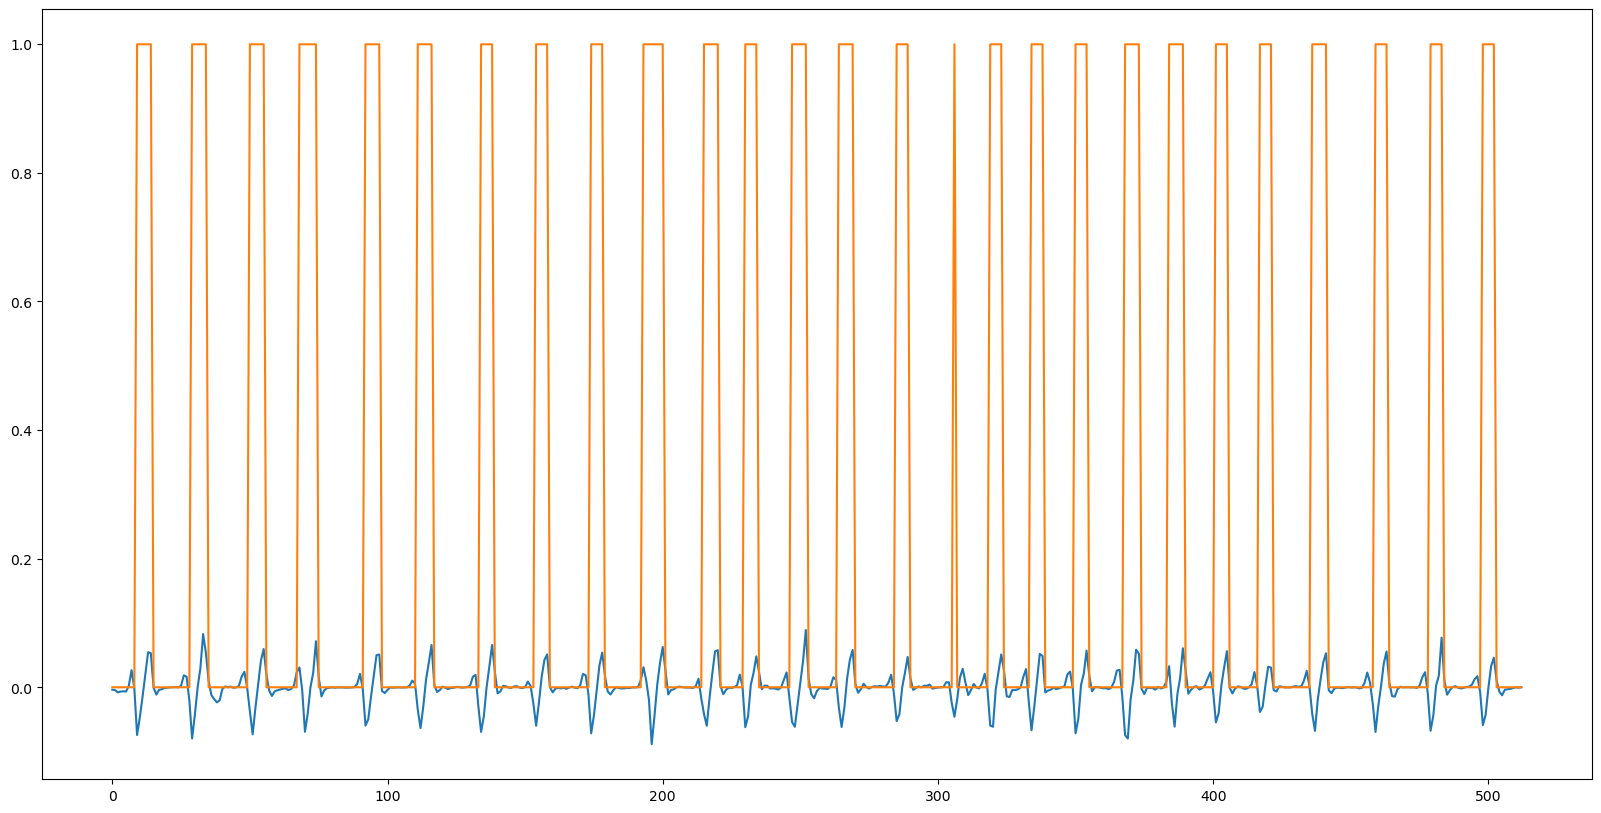

,relative_time,NOSE,LEFT_EYE_INNER,LEFT_EYE,LEFT_EYE_OUTER,RIGHT_EYE_INNER,RIGHT_EYE,RIGHT_EYE_OUTER,LEFT_EAR,RIGHT_EAR,...,RIGHT_HIP,LEFT_KNEE,RIGHT_KNEE,LEFT_ANKLE,RIGHT_ANKLE,LEFT_HEEL,RIGHT_HEEL,LEFT_FOOT_INDEX,RIGHT_FOOT_INDEX,action
0,5.009821,"(0.29108402132987976, 0.229238361120224, -0.26...","(0.2965296506881714, 0.21571697294712067, -0.2...","(0.299538791179657, 0.2163490355014801, -0.252...","(0.30181318521499634, 0.21712088584899902, -0....","(0.2867172658443451, 0.21426698565483093, -0.2...","(0.2833453416824341, 0.2139453887939453, -0.25...","(0.2803550958633423, 0.21384204924106598, -0.2...","(0.3045356869697571, 0.22411128878593445, -0.1...","(0.27500951290130615, 0.22129346430301666, -0....",...,"(0.2576601207256317, 0.5445773005485535, -0.01...","(0.3243409991264343, 0.7097708582878113, 0.056...","(0.24589499831199646, 0.712046205997467, -0.01...","(0.33241862058639526, 0.8523603677749634, 0.17...","(0.23953518271446228, 0.860846221446991, 0.101...","(0.32516032457351685, 0.8753678798675537, 0.18...","(0.24314531683921814, 0.87614506483078, 0.1048...","(0.35907280445098877, 0.9009360671043396, 0.06...","(0.2303514927625656, 0.9148485064506531, -0.01...",IDLE
1,5.105544,"(0.28977274894714355, 0.22437995672225952, -0....","(0.2955125570297241, 0.2114959955215454, -0.23...","(0.2981652021408081, 0.211965873837471, -0.235...","(0.3005521893501282, 0.21313482522964478, -0.2...","(0.2856541872024536, 0.2103467732667923, -0.23...","(0.2820327579975128, 0.21011431515216827, -0.2...","(0.2788263261318207, 0.21012134850025177, -0.2...","(0.3038676381111145, 0.22144262492656708, -0.1...","(0.2731461822986603, 0.2187187820672989, -0.15...",...,"(0.2571074962615967, 0.540361762046814, -0.009...","(0.32390809059143066, 0.7048874497413635, 0.05...","(0.24662168323993683, 0.7071404457092285, -0.0...","(0.33380627632141113, 0.847198486328125, 0.168...","(0.2409127652645111, 0.8557125329971313, 0.114...","(0.3280065953731537, 0.8689572811126709, 0.173...","(0.24547715485095978, 0.8712507486343384, 0.11...","(0.3602466583251953, 0.896185576915741, 0.0652...","(0.22931650280952454, 0.9095418453216553, 0.00...",IDLE
2,5.205405,"(0.288300096988678, 0.21797068417072296, -0.26...","(0.29388612508773804, 0.2045484483242035, -0.2...","(0.2964579463005066, 0.2049812525510788, -0.24...","(0.29917627573013306, 0.20564506947994232, -0....","(0.28388357162475586, 0.20340588688850403, -0....","(0.2802233397960663, 0.20303837954998016, -0.2...","(0.277113139629364, 0.2028847634792328, -0.251...","(0.30305472016334534, 0.21264417469501495, -0....","(0.2713995575904846, 0.21078750491142273, -0.1...",...,"(0.25719594955444336, 0.5396490097045898, -0.0...","(0.32529205083847046, 0.703833281993866, 0.050...","(0.2475035935640335, 0.7057960629463196, -0.00...","(0.33551549911499023, 0.8468722701072693, 0.17...","(0.2421298772096634, 0.8535884618759155, 0.119...","(0.32977691292762756, 0.8670401573181152, 0.18...","(0.2461160123348236, 0.8688715696334839, 0.124...","(0.36100849509239197, 0.8959115147590637, 0.07...","(0.23026235401630402, 0.9075676798820496, 0.00...",IDLE
3,5.301961,"(0.28802210092544556, 0.2085176408290863, -0.2...","(0.29332974553108215, 0.1943388432264328, -0.2...","(0.295911967754364, 0.1949683576822281, -0.250...","(0.29881638288497925, 0.1957734376192093, -0.2...","(0.28390055894851685, 0.19275817275047302, -0....","(0.280264675617218, 0.19227559864521027, -0.25...","(0.27690407633781433, 0.19222170114517212, -0....","(0.3028959631919861, 0.20355792343616486, -0.1...","(0.2711368203163147, 0.20126482844352722, -0.1...",...,"(0.25735020637512207, 0.532375693321228, -0.00...","(0.32673001289367676, 0.6965404748916626, 0.05...","(0.24861860275268555, 0.6967005729675293, 0.00...","(0.33780479431152344, 0.8398566246032715, 0.17...","(0.24268066883087158, 0.8517348170280457, 0.12...","(0.33166131377220154, 0.8602666258811951, 0.18...","(0.2464914619922638, 0.8662733435630798, 0.130...","(0.3618401288986206, 0.8895267844200134, 0.07

In [16]:
from scipy.ndimage import binary_closing

# plt.plot(avg)

derivative = np.diff(avg)
plt.figure(figsize=(20, 10))
plt.plot(derivative)
mask = np.fabs(derivative)>= 0.03
mask_closed = binary_closing(mask, structure=np.ones(5))
plt.plot(mask_closed)
plt.show()



not_jump_loc = np.argwhere(~mask_closed).flatten()

dataset.labels
import pandas as pd
df = pd.read_csv(csv_file)
# df.iloc[not_jump_loc].action = "IDLE"
df.loc[not_jump_loc, "action"] = "IDLE"
df.to_csv(Path("__data")/csv_file.name, index=False)
df.head()

